# 비정상 절차서 23-06 : 증기발생기 전열관 누설 시

## 1.0 데이터 처리

In [92]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_10048_(32).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 모든 원자로냉각재계통 누설 시 공통적 증상

### 2.1.1 PZR 수위 또는 압력 감소 → 만족

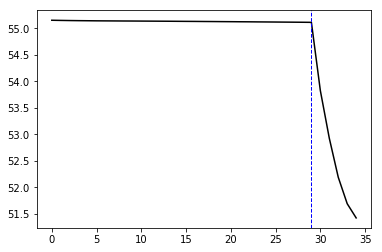

In [93]:
# ZINST63 : 가압기 수위
plt.plot(db['ZINST63'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

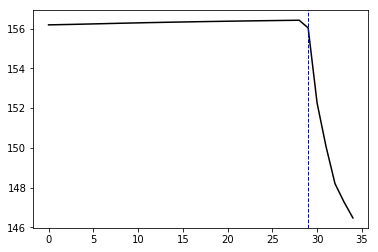

In [94]:
# ZINST58 : 가압기 압력
plt.plot(db['ZINST58'], color='k') # -> 압력 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [95]:
pzr_level, pzr_pres = [], []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZINST63'][i])
        sym_ch[1].append(db['ZINST58'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            pzr_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
    if len(sym_ch[1]) == 5:
        if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
            pzr_pres.append(i+1)
#             print(f'압력 감소 증상 만족 시간 : {i+1}초')
print(f'최초 수위 감소 증상 만족 시간 : {pzr_level[0]}초')
print(f'최초 압력 감소 증상 만족 시간 : {pzr_pres[0]}초')

최초 수위 감소 증상 만족 시간 : 35초
최초 압력 감소 증상 만족 시간 : 35초


Report
1. 단순 감소 표현으로 규칙을 생성할 경우, 고장 주입 전 증상이 만족하는 현상
2. 이를 해결하기 위해 고장 주입 이후 증상 평가를 수행
3. 2의 문제점으로 비정상 발생 이후 증상 평가를 해야한다는 강제사항이 발생
결론: 보여주기식으로는 2번으로 해도 상관없으나, 해당 부분은 고민할 필요성이 있다고 판단됨.
개선점: 추가적인 개선 방안으로 이동평균선의 활용이 검토됨. 추후 활용하여 판단할 예정임.

### 2.1.2 VCT 수위 감소 또는 보충횟수 증가 → 만족

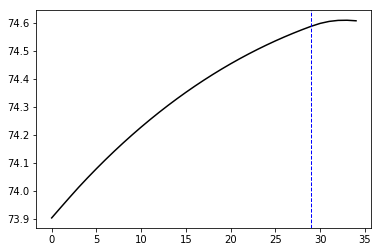

In [96]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [97]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['ZVCT'][i])
    if len(sym_ch[2]) == 5:
        if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2] > sym_ch[2][3] > sym_ch[2][4]:
            vct_level.append(i+1)
print(f'최초 VCT 수위 감소 증상 만족 시간 : {vct_level[0]}초')

IndexError: list index out of range

Report

VCT를 통한 보충수 유입 횟수의 산정이 어렵기 때문에 "VCT 수위 감소"만을 확인

### 2.1.3 발전소 제반요소의 변동이 없는 상태에서 충전유량의 증가 → 만족

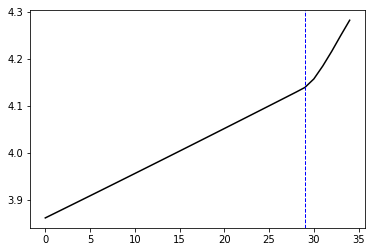

In [98]:
# WCHGNO : 충전유량
plt.plot(db['WCHGNO'], color='k') # -> 충전유량 증가 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [99]:
ch_flow = []
num = 3 # 증감을 판단하는 부분이 아니라면 필요없는 부분임.
for i in range(len(db)):
    if i > 29:
        sym_ch[num].append(db['WCHGNO'][i])
        if len(sym_ch[num]) == 5:
            if sym_ch[num][0] < sym_ch[num][1] < sym_ch[num][2] < sym_ch[num][3] < sym_ch[num][4]:
                ch_flow.append(i+1)
print(f'최초 충전유량 증가 증상 만족 시간 : {ch_flow[0]}초')

최초 충전유량 증가 증상 만족 시간 : 35초


### 증상 관련 Report



2.2 복수기 공기추출계통 방사선감시기의 고방사선경보
2.3 증기발생기 취출수계통 및 시료채취계통 방사선감지기의 고방사선경보
2.5 주증기관 방사선감지기의 고방사선경보

→ CNS에는 1차측 및 2차측 방사선경보기만 존재하므로, 앞선 2.2, 2.3, 2.5는 2차측 방사선경보기로 대체함.

* 이와 관련 해당 3개의 증상을 2.2로 통합함.

### 2.2 2차측 방사선감지기의 고방사선경보 → 불만족

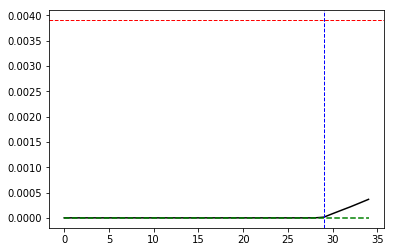

In [100]:
# DSECON : 2차측 방사선, 3.9E-3 : 2차측 방사선 경보 설정치
plt.plot(db['DSECON'], color='k') # -> 2차측 방사선 증가 확인
plt.plot(db['KLAMPO301'], color='g', linestyle='--') # -> 2차측 방사선 경보 미발생
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(3.9E-3, color='r', linestyle='--', linewidth=1)

In [101]:
sec_rad = []
for i in range(len(db)):
    if i > 29:
        if db['DSECON'][i] > 3.9E-3:
            sec_rad.append(i+1)
if len(sec_rad) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 2차측 고방사선 경보 증상 만족 시간 : {sec_rad[0]}초')

증상을 만족하지 못했습니다.


Report

CNS의 방사선 경보는 "KLAMPO301" 변수가 존재하지만, 로직상 1차측과 2차측 OR Gate로 엮여 있어 2차측만의 방사선 경보를 확인하기 힘듬.

이에 2차측 방사선 경보 설정치를 활용하여 규칙을 정립할 필요가 있음.

### 2.3 증기발생기의 급수 및 증기유량 편차 및 경보 발생 → 만족

경보 설명

(증기발생기의 증기유량 - 급수유량) > 증기발생기의 증기유량*0.1

증기유량의 0.1와 비교하는 이유는 증기유량과 급수유량이 비슷하기 때문임.

음의 값이 발생할 수도 있기 때문에 "절대값"을 고려할 필요가 있을 것으로 보임.

해당 경보 시그널(KLAMPO320)이 존재하지만, CNS 수집 데이터에는 반영되지 않음.

이에 로직을 구성하여 경보를 활성화해야할 필요가 있음.

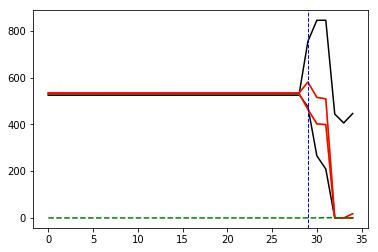

In [102]:
# WSTM1 : SG 1 증기유량, WSTM2 : SG 2 증기유량, WSTM3 : SG 3 증기유량
# WFWLN1 : SG 1 급수유량, WFWLN2 : SG 2 급수유량, WFWLN3 : SG 3 급수유량
# KLAMPO320 : 증기발생기 급수 및 증기유량 편차 경보
plt.plot(db['WSTM1'], color='k')
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WSTM2'], color='y')
plt.plot(db['WFWLN2'], color='y')
plt.plot(db['WSTM3'], color='r')
plt.plot(db['WFWLN3'], color='r')
plt.plot(db['KLAMPO320'], color='g', linestyle='--')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

# 해당 시나리오는 SG 3번에 문제가 발생한 부분임. -> 경보가 울릴 것 같은데 안울림.

In [103]:
sg_dev = []
for i in range(len(db)):
    if i > 29:
        RSTFWD = {1: db['WSTM1'][i] * 0.1, 2: db['WSTM2'][i] * 0.1, 3: db['WSTM3'][i] * 0.1}
        if (abs(db['WSTM1'][i] - db['WFWLN1'][i]) > RSTFWD[1]) or (abs(db['WSTM2'][i] - db['WFWLN2'][i]) > RSTFWD[2]) or (abs(db['WSTM3'][i] - db['WFWLN3'][i]) > RSTFWD[3]):
            sg_dev.append(i+1)
if len(sg_dev) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 2차측 고방사선 경보 증상 만족 시간 : {sg_dev[0]}초')

최초 2차측 고방사선 경보 증상 만족 시간 : 31초


## 3.0 자동동작사항

### 3.1 가압기 수위가 17% 이하로 감소할 경우 유출수 밸브(BG-HV001/002/003,BG-LV459/460)가 자동으로 차단된다. → 불만족

Report

절차서에 명시된 모든 유출수 밸브가 차단되었을 경우, 증상 만족으로 봄. (전체 4개 밸브)

또한, 가압기 수위 17% 이하도 규칙에 포함됨.

해당되는 17%가 설정치로 판단되나, 추후 어떤 설정치인지 파악할 필요 있음. (아마 Low setpoint or trip setpoint로 추정됨)

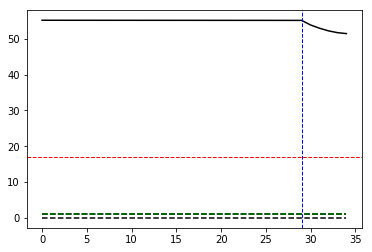

In [104]:
# ZINST63 : 가압기 수위, BHV1 : HV1 (45), BHV2 : HV2 (60), BHV3 : HV3 (75)
# BLV459 : 유출수 격리밸브
plt.plot(db['ZINST63'], color='k') # 가압기 수위 감소
plt.plot(db['BHV1'], color='k', linestyle='--')
plt.plot(db['BHV2'], color='k', linestyle='--')
plt.plot(db['BHV3'], color='k', linestyle='--')
plt.plot(db['BLV459'], color='g', linestyle='--')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
hline = plt.axhline(17, color='r', linestyle='--', linewidth=1) # 가압기 수위 17% 표현

In [105]:
auto1 = []
for i in range(len(db)):
    if i > 29:
        if (db['ZINST63'][i] < 17) and (db['BHV1'][i] == 0) and (db['BHV2'][i] == 0) and (db['BHV3'][i] == 0) and (db['BLV459'][i] == 0):
            auto1.append(i+1)
if len(auto1) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수밸브 차단 증상 만족 시간 : {auto1[0]}초')

증상을 만족하지 못했습니다.


### 3.2 증기발생기 전열관 누설 시 증기발생기 취출수계통 고방사선경보가 발생하면 증기발생기 취출수 차단밸브와 시료채취 차단밸브가 닫히고 동시에 취출수 방사선감시기 시료채취 차단밸브가 자동으로 닫힌다. → 불만족

report

증기발생기 취출수계통 (Blowdown System) 중 취출수 차단밸브는 미구현 상태임.

하지만, 취출수 유량 변수가 존재함에 따라 (취출수 유량 = 0)일 경우 취출수 차단 밸브가 닫힌다고 가정.

또한, 고방사선경보 발생이 전제조건이기 때문에, AND Gate로 묶어서 규칙을 구성함.

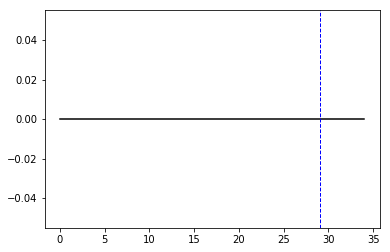

In [106]:
# ZINST116 : 취출수 유량
# DSECON : 2차측 방사선, 3.9E-3 : 2차측 방사선 경보 설정치
plt.plot(db['ZINST116'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [107]:
auto2 = []
for i in range(len(db)):
    if i > 29:
        if (db['DSECON'][i] > 3.9E-3) and (db['ZINST116']==0):
            auto2.append(i+1)
if len(auto2) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 취출수 차단밸브 닫힘 증상 만족 시간 : {auto2[0]}초')

증상을 만족하지 못했습니다.


### 3.3 RCS 압력이 136.78kg/cm2 이하가 되면 원자로 트립이 발생한다. → 만족

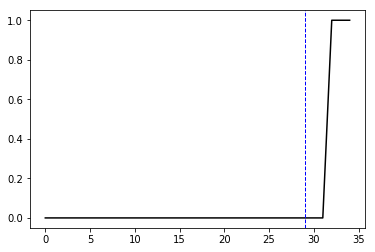

In [108]:
# KLAMPO9 : 원자로 트립 신호
plt.plot(db['KLAMPO9'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [109]:
auto3 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO9'][i] == 1:
            auto3.append(i+1)
if len(auto3) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 원자로 트립 증상 만족 시간 : {auto3[0]}초')

최초 원자로 트립 증상 만족 시간 : 33초


### 3.4 RCS 압력이 126.57kg/cm2 이하가 되면 안전주입이 발생한다. → 불만족

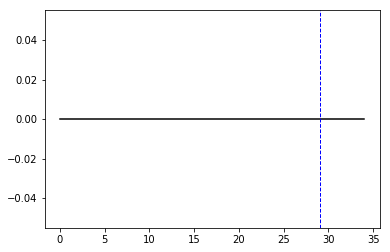

In [110]:
# KLAMPO6 : 안전주입 발생 신호
plt.plot(db['KLAMPO6'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [111]:
auto4 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO6'][i] == 1:
            auto4.append(i+1)
if len(auto4) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 안전주입 증상 만족 시간 : {auto4[0]}초')

증상을 만족하지 못했습니다.


## 4.0 긴급 조치사항

### 4.1 원자로 냉각재가 증기발생기 전열관을 통하여 2차계통으로 누설되고 있으면 정상-76(증기발생기 전열관 누설) 절차서를 수행한다.

## 5.0 후속 조치사항